In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("eval_ckpt150.csv")
display(df)

#read
obs_columns = [f'obs{i}' for i in range(15)]
obs_array = df[obs_columns].to_numpy()

obs_array = np.repeat(obs_array, repeats=3, axis=1) #repeat 3 times to simulate hisotry 3
obs_array.shape

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs5,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14
0,0,-5.607039e-13,-1.035936e-11,0.079485,-0.329381,0.638058,0.109683,4.483758,-4.792757e-10,-1.963810e-09,...,4.149016e-09,1.337705e-09,1.777128e-08,2.641428e-09,-0.973978,-0.226644,-0.541211,-0.840887,-0.894049,-0.447969
1,1,-2.915986e-04,4.536705e-05,0.078309,-0.324899,0.622800,0.110622,4.435982,-5.393645e-02,8.710887e-03,...,3.149938e-02,-1.225126e-01,5.614581e-02,-2.410247e-01,-0.962042,-0.272901,-0.541211,-0.840887,-0.899846,-0.436208
2,2,-1.040036e-03,1.823950e-04,0.076779,-0.311257,0.579811,0.112795,4.300138,-8.961753e-02,1.846746e-02,...,7.584372e-02,-2.365920e-01,1.041195e-01,-4.697657e-01,-0.916221,-0.400673,-0.541211,-0.840887,-0.915180,-0.403045
3,3,-1.981148e-03,4.260503e-04,0.074940,-0.286783,0.511723,0.114660,4.081288,-9.172846e-02,2.999213e-02,...,1.423519e-01,-3.400148e-01,1.323182e-01,-6.843922e-01,-0.807378,-0.590034,-0.541211,-0.840887,-0.936538,-0.350566
4,4,-2.956220e-03,6.125970e-04,0.075397,-0.279858,0.474245,0.128089,3.802913,-6.285636e-02,2.849954e-02,...,2.407318e-02,-1.702393e-01,1.327701e-01,-8.312293e-01,-0.614159,-0.789182,-0.541211,-0.840887,-0.947425,-0.319978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,-5.023606e+00,-4.330860e+00,0.073961,-2.970182,-0.124443,-1.517253,-26.666672,1.225818e-01,-2.193468e-02,...,1.459828e-01,-7.605270e-03,-2.794286e-02,2.739537e-02,-0.999321,0.036857,-0.612764,0.790266,0.999962,0.008711
1996,1996,-5.022411e+00,-4.330930e+00,0.074488,-2.972646,-0.141754,-1.520901,-26.656096,1.167751e-01,6.188227e-03,...,1.413638e-01,-2.081409e-02,-2.619294e-02,2.765051e-02,-0.998875,0.047424,-0.612764,0.790266,0.999887,-0.015003
1997,1997,-5.021252e+00,-4.330751e+00,0.074931,-2.979310,-0.158003,-1.525311,-26.646542,1.126271e-01,3.248775e-02,...,1.326825e-01,-3.610137e-02,-2.620851e-02,2.700503e-02,-0.998376,0.056965,-0.612764,0.790266,0.999140,-0.041467
1998,1998,-5.020155e+00,-4.330285e+00,0.075343,-2.989240,-0.174278,-1.529806,-26.636852,1.075742e-01,5.888010e-02,...,1.298968e-01,-5.109244e-02,-2.238668e-02,2.445284e-02,-0.997777,0.066636,-0.612764,0.790266,0.997471,-0.071078


(2000, 45)

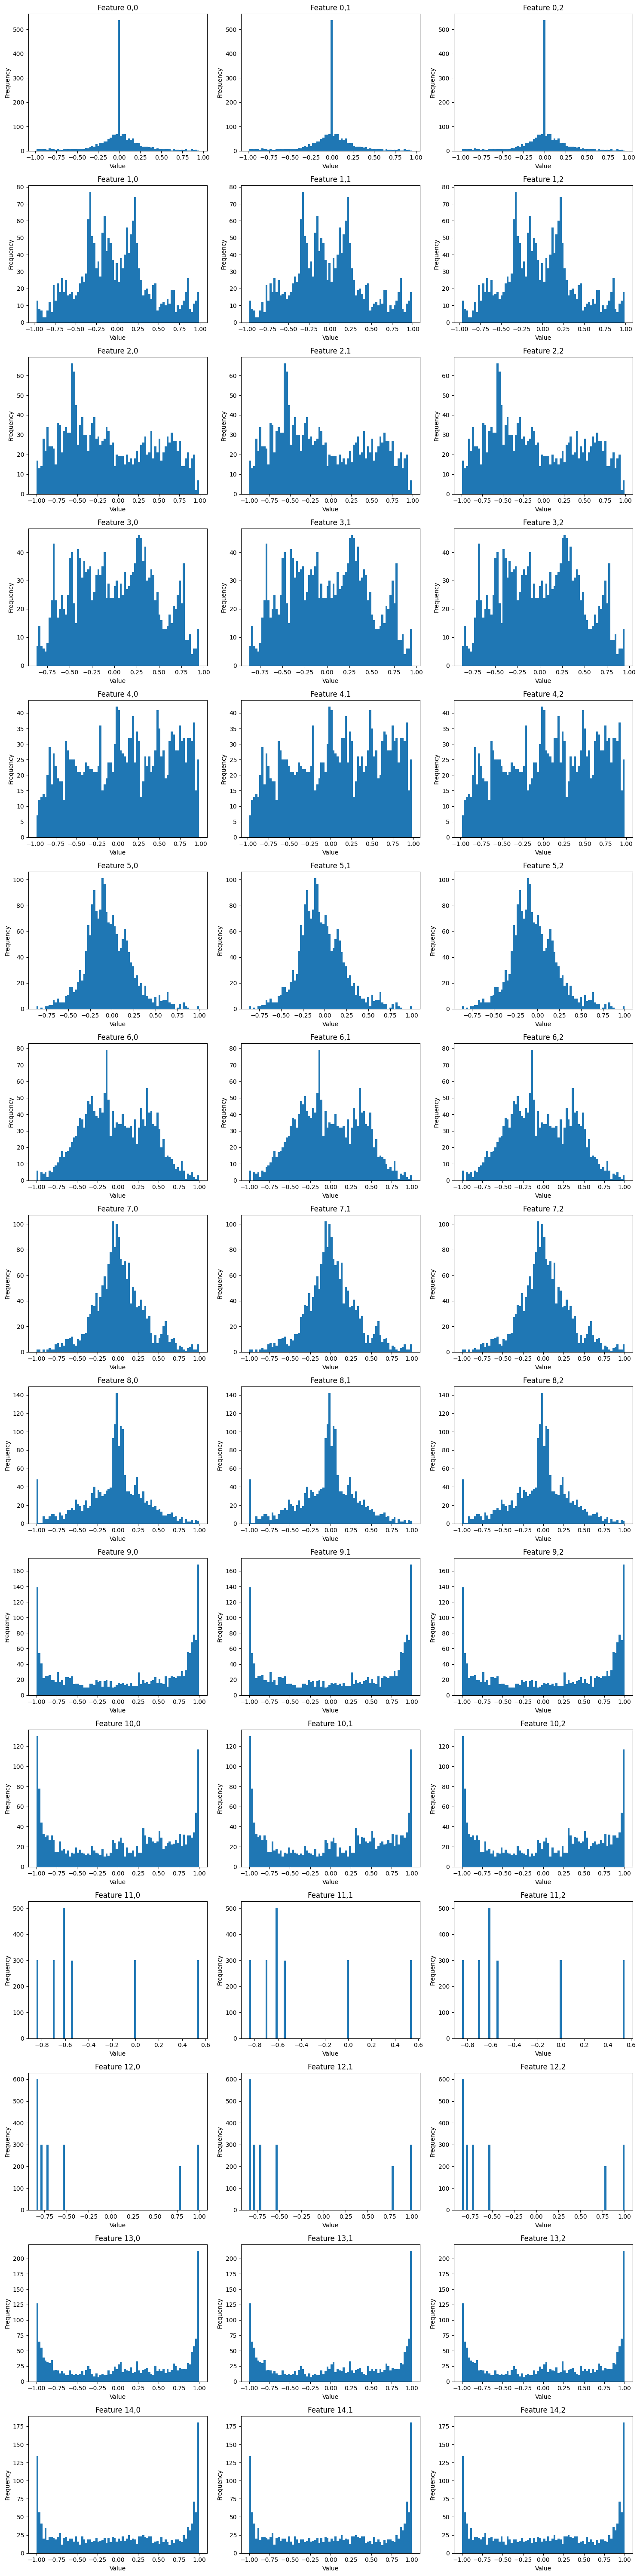

In [2]:

num_features = obs_array.shape[1]
num_rows = (num_features + 2) // 3  # Calculate rows needed, rounding up
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    ax = axes[i]
    ax.hist(obs_array[:,i], bins=80)
    ax.set_title(f'Feature {i//3},{i%3}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for i in range(num_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

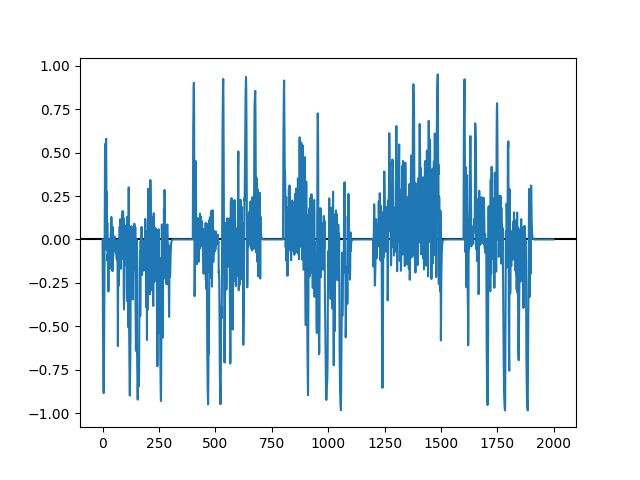

In [3]:
%matplotlib widget
plt.figure()
plt.axhline(0, color='black')
plt.plot(obs_array[:,0])

Text(0.5, 0, 'Time (s)')

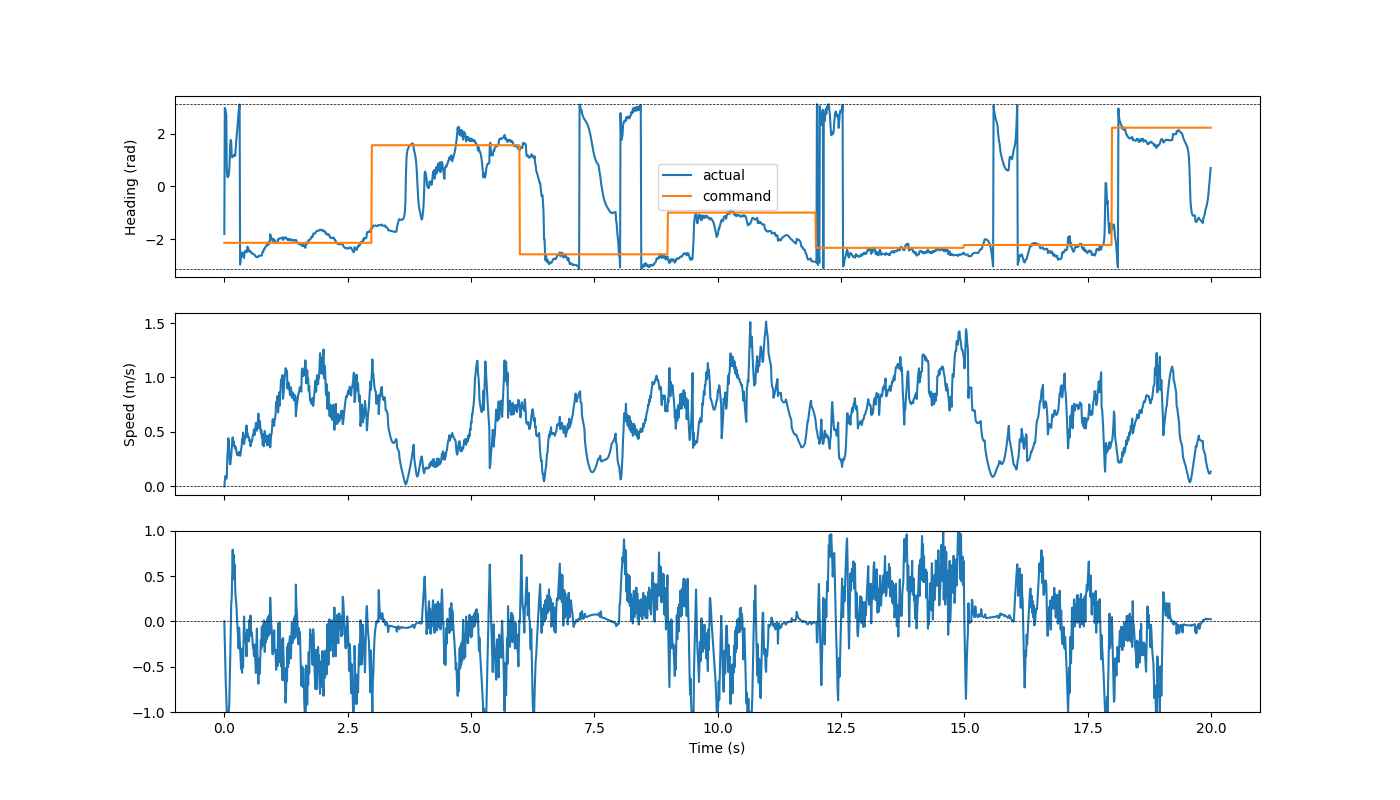

In [9]:
heading = np.arctan2(df['vel1'], df['vel0'])
speed = np.linalg.norm(df[['vel0', 'vel1']], axis=1)
# heading

des_heading = np.arctan2(df['obs12'], df['obs11'])
fig, axs = plt.subplots(3,1, sharex=True, figsize=(14,8))
axs[0].plot(np.arange(len(df))*0.01, heading, label='actual')
axs[0].plot(np.arange(len(df))*0.01, des_heading, label='command')
axs[0].axhline(-np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].axhline(np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].set_ylabel('Heading (rad)')
axs[0].legend()


axs[1].plot(np.arange(len(df))*0.01, speed)
axs[1].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[1].set_ylabel('Speed (m/s)')


action_filtered = np.zeros(len(df))
alpha = 0.6
for i in range(1, len(df)):
    action_filtered[i] = action_filtered[i-1]*alpha + df['action'][i]*(1-alpha)

axs[2].plot(np.arange(len(df))*0.01, df['obs8'])
# axs[2].plot(np.arange(len(df))*0.01, df['action'])
# axs[2].plot(np.arange(len(df))*0.01, action_filtered)
axs[2].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[2].set_ylim(-1, 1)


axs[-1].set_xlabel('Time (s)')